# Solución correcta

fuimos probando diferentes modelos, donde cambiábamos cómo realizábamos el mapeo.
- El modelo donde tipo1:1 y el resto 0 tuvo una precisión cercana al 92%
- El modelo donde tipo2:1 y el resto 0 tuvo una precisión cercana al 99%
- El modelo donde tipo3:1 y el resto 0 tuvo una precisión cercana al 92%

In [43]:
FUENTES_DIR  = '../Fuentes'
DATOS_DIR   = '../Datos/' 

import sys
sys.path.append(FUENTES_DIR)

import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing, metrics
from ClassPerceptron import Perceptron

In [44]:
datos = pd.read_csv(DATOS_DIR + "Semillas.csv")
mapeo = {'Clase': {'Tipo1':0, 'Tipo2':1,'Tipo3':0}}
datos.replace(mapeo,inplace=True)
datos.head()
#datos.Clase.unique()

,Area,Perimetro,Compacidad,LongNucleo,AnchoNucleo,Asimetria,LongSurco,Clase
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [45]:
X = np.array(datos.iloc[:,:-1])
T = np.array(datos['Clase'])


normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)

print(X)

[[ 1.42097769e-01  2.15462437e-01  6.06017918e-05 ...  1.41701823e-01
  -9.86151745e-01 -3.83577423e-01]
 [ 1.11880257e-02  8.22375713e-03  4.28515270e-01 ...  1.97432229e-01
  -1.78816620e+00 -9.22013487e-01]
 [-1.92066576e-01 -3.60200562e-01  1.44238325e+00 ...  2.08047544e-01
  -6.67479334e-01 -1.18919199e+00]
 ...
 [-5.67570840e-01 -6.90247348e-01  7.33948301e-01 ... -7.06044846e-02
   3.07658816e+00 -7.18060432e-01]
 [-1.03608992e+00 -1.03564515e+00 -8.01701104e-01 ... -1.12152071e+00
  -6.81351965e-02 -7.42534799e-01]
 [-8.77620233e-01 -9.35863561e-01 -1.10234659e-01 ... -7.55292327e-01
   1.29122264e+00 -7.03783718e-01]]


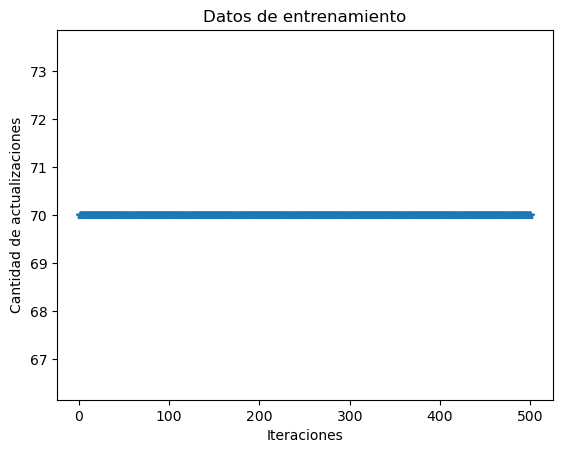

In [46]:
ppn = Perceptron(alpha=0.0001, n_iter=500, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X, T)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [47]:
Y_test = ppn.predict(X)
nAciertos = np.sum(Y_test == T)
print("Dimensiones de Y_test:", Y_test.shape)
print("Dimensiones de T_test:", T.shape)
print("cantidad de tests: ", X.shape[0])
print("aciertos: ", nAciertos)
print("%% de aciertos = %.2f %%" % (100 * nAciertos / X.shape[0]))

Dimensiones de Y_test: (210,)
Dimensiones de T_test: (210,)
cantidad de tests:  210
aciertos:  140
% de aciertos = 66.67 %
